# predicitng the sale price of bulldozers using machine learning
In this notebook, we are going through below steps
## 1.Problem definition
How well can we predict the future sale price of a bulldozer, given its characteristics and previous exapmles of how much similar bulldozers have been sold for?

## 2.Data
The data is downloaded from the kaggle bluebook for bulldozers competition.
https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

## 3.Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4.Features
Go through the data set to find more about features.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing training and validation sets
df=pd.read_csv("TrainAndValid.csv",low_memory=False)

In [96]:
df.shape

(412698, 53)

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

[Text(0.5, 0, 'dates'),
 Text(0, 0.5, 'price'),
 Text(0.5, 1.0, 'sales date and price')]

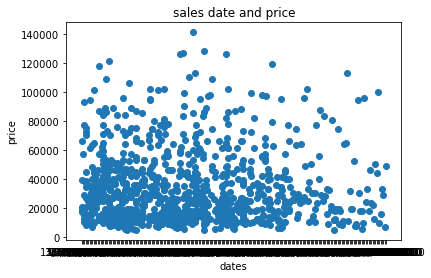

In [6]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])
ax.set(xlabel="dates",ylabel="price",title="sales date and price")

<AxesSubplot:ylabel='Frequency'>

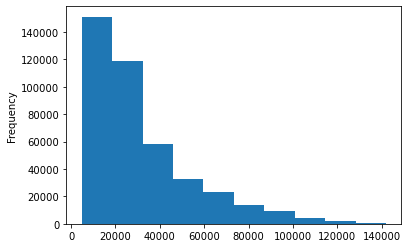

In [7]:
df["SalePrice"].plot.hist()

In [8]:
df=pd.read_csv("TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [9]:
df.saledate.dtype

dtype('<M8[ns]')

In [10]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

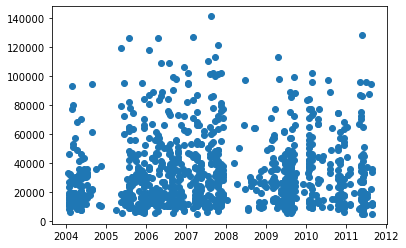

In [11]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [12]:
# It is good practice to sort the dataframe by date when working with time series
df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [13]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [14]:
df_tmp=df.copy() #making copy of original df so when we manipulate the copy, we've still got our original data
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# addin datetime parameter for saledate column
df.saledate[:1].dt.year

205615    1989
Name: saledate, dtype: int64

In [16]:
df_tmp["saleYear"]=df_tmp["saledate"].dt.year
df_tmp["saleMonth"]=df_tmp["saledate"].dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"]=df_tmp["saledate"].dt.dayofyear

In [17]:
df_tmp.iloc[0:3,53:]

,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1989,1,17,1,17
274835,1989,1,31,1,31
141296,1989,1,31,1,31


In [18]:
df_tmp.drop("saledate",axis=1,inplace=True)

# 5. Modelling


In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
np.random.seed(42)
model=RandomForestRegressor(n_jobs=-1)
model.fit(df_tmp("SalePrice",axis=1),df_tmp.SalePrice)

TypeError: 'DataFrame' object is not callable

### Converting string to categories

In [21]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [22]:
df_tmp.UsageBand.value_counts()

Medium    35832
Low       25311
High      12527
Name: UsageBand, dtype: int64

In [23]:
# one_way of converting str type into category type
df_tmp.UsageBand=df_tmp.UsageBand.astype("category")
df_tmp.UsageBand=df_tmp.UsageBand.cat.set_categories(["Low", "Medium", "High"], ordered=True)

In [24]:
df_tmp.UsageBand.dtype

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)

In [25]:
df_tmp.UsageBand.value_counts()

Medium    35832
Low       25311
High      12527
Name: UsageBand, dtype: int64

In [26]:
# converting all columns of string type into category type to make the model work on the dataset

for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()
#         print(label)


In [27]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [28]:
print(df_tmp.state.cat.categories)

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')


In [29]:
df_tmp.state[0:6]

205615      Texas
274835    Florida
141296    Florida
212552    Florida
62755     Florida
54653     Florida
Name: state, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [30]:
df_tmp


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119


In [31]:
df.iloc[:,10:20]

,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc
205615,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors
274835,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader
141296,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors
212552,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader
62755,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors
...,...,...,...,...,...,...,...,...,...,...
410879,D38E,D38,E,NaN,NaN,NaN,"Track Type Tractor, Dozer - 75.0 to 85.0 Horse...",California,TTT,Track Type Tractors
412476,2064,2064,NaN,NaN,NaN,NaN,Skid Steer Loader - 1751.0 to 2201.0 Lb Operat...,California,SSL,Skid Steer Loaders
411927,337G,337,G,NaN,NaN,Mini,"Hydraulic Excavator, Track - 5.0 to 6.0 Metric...",California,TEX,Track Excavators
407124,12G,12,G,NaN,NaN,NaN,Motorgrader - 130.0 to 145.0 Horsepower,California,MG,Motor Graders


In [32]:
df_tmp.state.cat.codes.value_counts()

8     67320
43    53110
4     29761
48    16222
9     14633
19    13322
23    13240
34    12369
12    11540
5     11529
29    11156
32    10636
42    10298
0     10292
37    10234
40     9951
2      9364
31     8639
6      8276
22     7885
24     7178
27     6932
17     6627
16     5351
18     5096
13     4124
3      3933
30     3631
45     3046
44     2801
51     2745
28     2738
47     2353
11     2025
36     1911
21     1831
52     1672
25     1336
14     1336
35     1326
26      866
50      840
15      667
7       510
33      480
1       430
20      347
46      300
41      244
10      118
39       83
38       42
49        2
dtype: int64

In [33]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [34]:
# let's save the current dataframe(exporting the current dataframe)
df_tmp.to_csv("train_tmp.csv",index=False)


In [35]:
# importing the preprocessed data
df_tmp=pd.read_csv("train_tmp.csv",low_memory=False)

In [36]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

### Fill missing values

#### fill numerical missing values first

In [37]:

for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):#it returns the numerical type columns
        if pd.isnull(content).sum(): #It returns columns with null values
#             Adding a binary column which tells us if the data was missing
            df_tmp[label+"is_missing"]=pd.isnull(content)
#             filling missing values with median
            df_tmp[label]=content.fillna(content.median())
            print(label)
    


auctioneerID
MachineHoursCurrentMeter


In [38]:
df.auctioneerID.isna().sum()

20136

#### filling and turning categorical variable into numbers

In [39]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
        

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [40]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [41]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"is_missing"]=pd.isnull(content)
        df_tmp[label]=pd.Categorical(content).codes+1
        
        

In [42]:
pd.Categorical(df["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [43]:
df_tmp.isna().sum()[:10]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
dtype: int64

In [44]:
df_tmp["auctioneerID"].dtype

dtype('float64')

##### We got our data ready in numeric form and filled all the missing values, so now, we are good to build a machine learning model.

In [45]:
len(df_tmp)

412698

In [46]:
%%time 
# Instantiating a randomforest model
#calculate the how much it takes to run a cell
model=RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

CPU times: total: 26min 27s
Wall time: 2min 33s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [47]:
%%time 
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp.SalePrice)

CPU times: total: 46.5 s
Wall time: 7.79 s


0.9875468079970562

Till now, we have converted our data into numeric form and fit the model to our data. But this metric is not realiable as we performed training and testing on the same data. So, let's seperate train set and test set.

### splitting data into train and validation sets

In [48]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [49]:
# lets put data upto 2011 in training set and 2012 and onwards into validation set
df_val=df_tmp[df_tmp.saleYear==2012]
df_train=df_tmp[df_tmp.saleYear!=2012]

In [50]:
df_train

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,29000.0,1074871,4331,149,2.0,1000,0.0,0,3137,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,11000.0,1812622,9580,149,2.0,2005,0.0,0,4514,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,11000.0,1811599,9580,149,2.0,2005,0.0,0,4514,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,18000.0,1858173,17432,149,2.0,2004,0.0,0,3389,...,True,True,True,True,True,True,True,True,True,True


In [51]:
len(df_val),len(df_train)

(11573, 401125)

In [52]:
# split data into x and y
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice

In [53]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [54]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [55]:
# creating a function to evaluate our model
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
def show_scores(model):
    train_preds=model.predict(X_train)
    valid_preds=model.predict(X_valid)
    scores={"Train MAE":mean_absolute_error(y_train,train_preds),
           "Valid MAE":mean_absolute_error(y_valid,valid_preds),
           "Train RMSLE":rmsle(y_train,train_preds),
           "Valid RMSLE":rmsle(y_valid,valid_preds)}
    return scores

In [56]:
model=RandomForestRegressor(n_jobs=1,random_state=42,max_samples=10000)
model.fit(X_train,y_train)


RandomForestRegressor(max_samples=10000, n_jobs=1, random_state=42)

In [57]:
print(show_scores(model))

{'Train MAE': 5561.2988092240585, 'Valid MAE': 7177.26365505919, 'Train RMSLE': 0.257745378256977, 'Valid RMSLE': 0.29362638671089003}


### Hyper parameter tuning with RandomizedSearchCV

In [59]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[10000]}
# Instantiate randomizedSearchCv model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                 random_state=42),
                           param_distributions=rf_grid,
                           n_iter=5,
                           cv=5,
                           verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 1min 26s
Wall time: 1min 22s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [60]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

### Training the model with the best hyperparameters

In [62]:
ideal_model=RandomForestRegressor(n_estimators= 80,
 min_samples_split= 14,
 min_samples_leaf= 11,
 max_samples= 10000,
 max_features= 0.5,
 max_depth= None)
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, max_samples=10000, min_samples_leaf=11,
                      min_samples_split=14, n_estimators=80)

In [63]:
show_scores(ideal_model)

{'Train MAE': 6470.146548665595,
 'Valid MAE': 7761.535714868018,
 'Train RMSLE': 0.29106248433604964,
 'Valid RMSLE': 0.3130533038346146}

In [64]:
show_scores(rs_model)

{'Train MAE': 6465.359767604394,
 'Valid MAE': 7792.965908792965,
 'Train RMSLE': 0.29073651146101087,
 'Valid RMSLE': 0.3146049386188446}

#### we need to convert the test dataset into numerical and fill missing values just as we have done to training set

In [152]:
df_test=pd.read_csv("Test.csv",parse_dates=["saledate"])
df_test.shape

(12457, 52)

In [153]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df


In [155]:
test=preprocess_data(df_test)
test.head

<bound method NDFrame.head of        SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0      1227829    1006309     3168         121             3      1999   
1      1227844    1022817     7271         121             3      1000   
2      1227847    1031560    22805         121             3      2004   
3      1227848      56204     1269         121             3      2006   
4      1227863    1053887    22312         121             3      2005   
...        ...        ...      ...         ...           ...       ...   
12452  6643171    2558317    21450         149             2      2008   
12453  6643173    2558332    21434         149             2      2005   
12454  6643184    2558342    21437         149             2      1000   
12455  6643186    2558343    21437         149             2      2006   
12456  6643196    2558346    21446         149             2      2008   

       MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0   

In [156]:
test["auctioneerIDis_missing"]=False

In [157]:
test.shape

(12457, 102)

In [158]:
test_preds = ideal_model.predict(test)

C:\Users\konda\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...
Feature names seen at fit time, yet now missing:
- Backhoe_Mountingis_missing
- Blade_Extensionis_missing
- Blade_Typeis_missing
- Blade_Widthis_missing
- Coupler_Systemis_missing
- ...

  warnings.warn(message, FutureWarning)


In [159]:
test_preds

array([23913.40877331, 21897.28422089, 54160.02143996, ...,
       14365.81323714, 18734.44146779, 23908.39316393])

In [161]:
# Formating predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,23913.408773
1,1227844,21897.284221
2,1227847,54160.021440
3,1227848,62581.490519
4,1227863,41006.717502
...,...,...
12452,6643171,38115.880678
12453,6643173,17335.064422
12454,6643184,14365.813237
12455,6643186,18734.441468


### Feature Importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (SalePrice).

In [162]:
ideal_model.feature_importances_

array([2.50885605e-02, 2.57068739e-02, 3.80827545e-02, 1.20498731e-03,
       1.92236352e-03, 2.12369286e-01, 1.57489178e-03, 5.86223845e-04,
       3.99819951e-02, 3.02618169e-02, 6.64521230e-02, 3.27388960e-03,
       2.53246686e-02, 1.67364597e-01, 4.36704206e-02, 3.48303238e-03,
       3.19660564e-03, 2.85009786e-03, 2.73284489e-03, 6.86888689e-02,
       3.93673755e-04, 3.24388556e-04, 9.37011785e-04, 2.68152075e-04,
       1.61937526e-03, 6.72632724e-06, 1.39620014e-03, 1.34895160e-02,
       1.84887921e-03, 1.38376950e-03, 3.01039722e-03, 4.66236551e-03,
       4.77063403e-03, 1.22748915e-03, 5.42327557e-04, 1.59593761e-02,
       8.46492320e-04, 1.51728596e-02, 1.59157755e-03, 4.00327589e-03,
       1.31754393e-03, 1.31872778e-03, 2.90692576e-03, 5.60650206e-04,
       3.66747950e-04, 1.92585763e-04, 2.82304608e-04, 2.06031089e-03,
       9.42071045e-04, 4.11852058e-04, 1.03929006e-03, 5.12083712e-02,
       1.92112489e-03, 3.39189014e-03, 1.41388184e-03, 4.66328687e-03,
      

In [163]:
# we can plot those feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

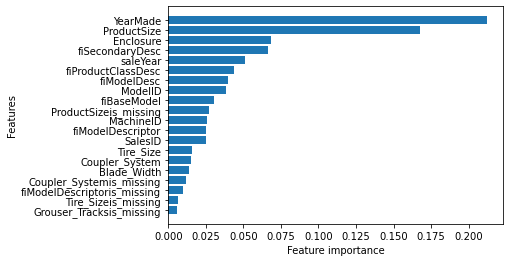

In [164]:
plot_features(X_train.columns, ideal_model.feature_importances_)